# Project: Horse or Human Classification using CNN

We have data for training:

500 horse images 527 human(male & female) images

For validation:

122 horse images 123 human(male & female) images

Problem Statement:
Classifie given image is horse or human(male/female)

Solution:
To solve this problem we are going to use Deep Learning Algorithm that is CNN (Convolutional Neural Network)

# import libraries

In [2]:
import matplotlib.pyplot as plt
import keras
from keras.preprocessing.image import ImageDataGenerator
import keras.api

In [3]:
pip install keras==2.13.1

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [30]:
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
#from keras.layers.normalization import BatchNormalization
from keras.regularizers import l2


In [7]:
keras.__version__


'2.13.1'

In [8]:
train_data_path='C:\\Users\ASUS\\DEEP Learning Project\\Horse or Human classification using cnn\\train'
validation_data_path='C:\\Users\ASUS\DEEP Learning Project\\Horse or Human classification using cnn\\validation'

Data Preprocessing

In [10]:
training_datagen=ImageDataGenerator(rescale=1./255,
                                      rotation_range=40,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      shear_range=0.2,
                                      zoom_range=0.2,
                                      horizontal_flip=True,
                                      fill_mode='nearest')

In [11]:
training_data=training_datagen.flow_from_directory(train_data_path, 
                                      target_size=(150, 150), 
                                      batch_size=32,
                                      class_mode='binary')

Found 1027 images belonging to 2 classes.


In [12]:
training_data.class_indices

{'horses': 0, 'humans': 1}

In [13]:
valid_datagen = ImageDataGenerator(rescale=1./255)

In [14]:
valid_data =  valid_datagen.flow_from_directory(validation_data_path, 
                                      target_size=(150, 150), 
                                      batch_size=32,
                                      class_mode='binary')

Found 256 images belonging to 2 classes.


In [15]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

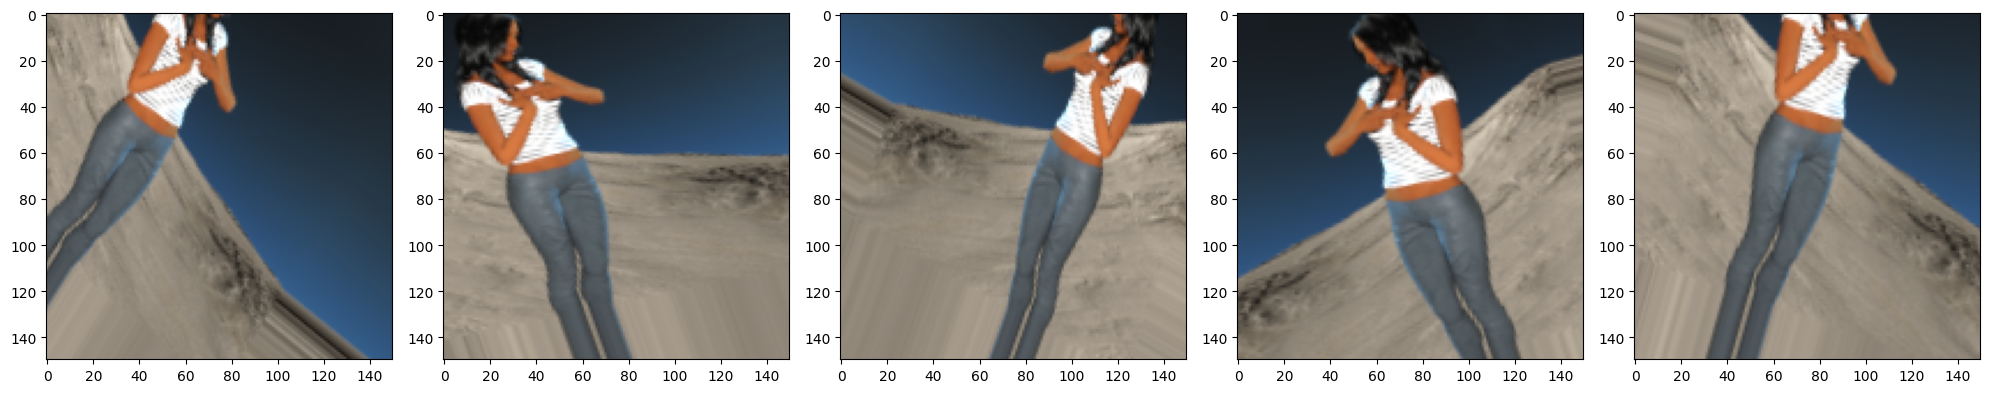

In [16]:
images = [training_data[0][0][0] for i in range(5)]
plotImages(images)

Building cnn model

In [17]:
#Building cnn model
cnn_model = keras.models.Sequential([
                                    keras.layers.Conv2D(filters=32, kernel_size=3, input_shape=[150, 150, 3]),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                    keras.layers.Conv2D(filters=64, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                    keras.layers.Conv2D(filters=128, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),                                    
                                    keras.layers.Conv2D(filters=256, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),

                                    keras.layers.Dropout(0.5),                                                                        
                                    keras.layers.Flatten(), # neural network beulding
                                    keras.layers.Dense(units=128, activation='relu'), # input layers
                                    keras.layers.Dropout(0.1),                                    
                                    keras.layers.Dense(units=256, activation='relu'),                                    
                                    keras.layers.Dropout(0.25),                                    
                                    keras.layers.Dense(units=2, activation='softmax') # output layer
                                    ])

In [18]:
# compile cnn model
cnn_model.compile(optimizer = Adam(lr=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [20]:
model_path="C:\\Users\ASUS\\DEEP Learning Project\\Horse or Human classification using cnn\\horse_or_human_predictor.h5"

In [21]:
checkpoint = ModelCheckpoint(model_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

# train cnn model

In [22]:

history = cnn_model.fit(training_data, 
                          epochs=100, 
                          verbose=1, 
                          validation_data= valid_data,
                          callbacks=callbacks_list)

Epoch 1/100
33/33 [==============================] - ETA: 0s - loss: 0.7947 - accuracy: 0.5511
Epoch 1: val_accuracy improved from -inf to 0.53516, saving model to C:\Users\ASUS\DEEP Learning Project\Horse or Human classification using cnn\horse_or_human_predictor.h5


C:\Users\ASUS\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


33/33 [==============================] - 77s 2s/step - loss: 0.7947 - accuracy: 0.5511 - val_loss: 0.6940 - val_accuracy: 0.5352
Epoch 2/100
33/33 [==============================] - ETA: 0s - loss: 0.5632 - accuracy: 0.7050
Epoch 2: val_accuracy improved from 0.53516 to 0.53906, saving model to C:\Users\ASUS\DEEP Learning Project\Horse or Human classification using cnn\horse_or_human_predictor.h5
33/33 [==============================] - 65s 2s/step - loss: 0.5632 - accuracy: 0.7050 - val_loss: 1.7522 - val_accuracy: 0.5391
Epoch 3/100
33/33 [==============================] - ETA: 0s - loss: 0.4932 - accuracy: 0.7760
Epoch 3: val_accuracy improved from 0.53906 to 0.62500, saving model to C:\Users\ASUS\DEEP Learning Project\Horse or Human classification using cnn\horse_or_human_predictor.h5
33/33 [==============================] - 80s 2s/step - loss: 0.4932 - accuracy: 0.7760 - val_loss: 1.7265 - val_accuracy: 0.6250
Epoch 4/100
33/33 [==============================] - ETA: 0s - loss: 0.

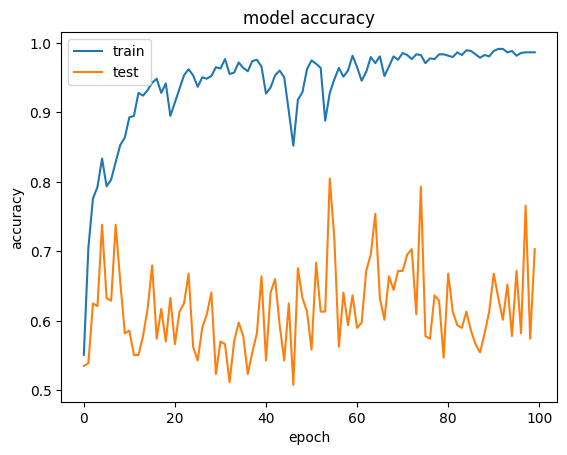

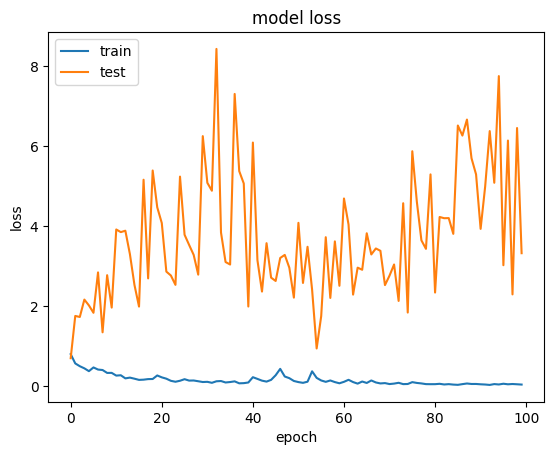

In [23]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Model another train


In [33]:
from keras.layers import BatchNormalization

In [34]:
#Building cnn model
cnn_model2 = keras.models.Sequential([
                                    keras.layers.Conv2D(filters=32, kernel_size=7, input_shape=[150, 150, 3]),
                                    BatchNormalization(),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),

                                    keras.layers.Conv2D(filters=64, kernel_size=5),
                                    BatchNormalization(),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),

                                    keras.layers.Conv2D(filters=128, kernel_size=3),
                                    BatchNormalization(),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),  

                                    keras.layers.Conv2D(filters=256, kernel_size=3),
                                    BatchNormalization(),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),

                                    keras.layers.Dropout(0.5),                                                                        
                                    keras.layers.Flatten(), # neural network beulding
                                    keras.layers.Dense(units=128, activation='relu'), # input layers
                                    keras.layers.Dropout(0.1),                                    
                                    keras.layers.Dense(units=256, activation='relu'),                                    
                                    keras.layers.Dropout(0.25),                                    
                                    keras.layers.Dense(units=2, activation='softmax') # output layer
                                    ])

In [35]:
# compile cnn model
cnn_model2.compile(optimizer = Adam(lr=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [36]:
model_path="C:\\Users\ASUS\\DEEP Learning Project\\Horse or Human classification using cnn\\horse_or_human_predictor_v1.h5"

In [37]:
checkpoint = ModelCheckpoint(model_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

Train second model

In [38]:
history = cnn_model.fit(training_data, 
                          epochs=100, 
                          verbose=1, 
                          validation_data= valid_data,
                          callbacks=callbacks_list)

Epoch 1/100
33/33 [==============================] - ETA: 0s - loss: 0.0302 - accuracy: 0.9864
Epoch 1: val_accuracy improved from -inf to 0.63281, saving model to C:\Users\ASUS\DEEP Learning Project\Horse or Human classification using cnn\horse_or_human_predictor_v1.h5
33/33 [==============================] - 65s 2s/step - loss: 0.0302 - accuracy: 0.9864 - val_loss: 5.1970 - val_accuracy: 0.6328
Epoch 2/100


C:\Users\ASUS\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


33/33 [==============================] - ETA: 0s - loss: 0.0481 - accuracy: 0.9815
Epoch 2: val_accuracy improved from 0.63281 to 0.66016, saving model to C:\Users\ASUS\DEEP Learning Project\Horse or Human classification using cnn\horse_or_human_predictor_v1.h5
33/33 [==============================] - 52s 2s/step - loss: 0.0481 - accuracy: 0.9815 - val_loss: 3.6489 - val_accuracy: 0.6602
Epoch 3/100
33/33 [==============================] - ETA: 0s - loss: 0.0301 - accuracy: 0.9883
Epoch 3: val_accuracy did not improve from 0.66016
33/33 [==============================] - 59s 2s/step - loss: 0.0301 - accuracy: 0.9883 - val_loss: 5.1208 - val_accuracy: 0.6523
Epoch 4/100
33/33 [==============================] - ETA: 0s - loss: 0.0309 - accuracy: 0.9883
Epoch 4: val_accuracy did not improve from 0.66016
33/33 [==============================] - 51s 2s/step - loss: 0.0309 - accuracy: 0.9883 - val_loss: 6.7353 - val_accuracy: 0.6406
Epoch 5/100
33/33 [==============================] - ETA: 0